# Дискретные сигналы

Сигналом обычно называют то, что несет в себе какие-то данные. По большей
части сигналы передают информацию о состоянии или поведении физической
системы. На математическом языке сигналы — это функции одной или более независимых пе-
ременных. По общему соглашению независимой переменной в математическом представлении сигнала
выступает время, хотя в отдельных примерах независимая переменная в сигнале
фактически временем не является.

Независимая переменная в математической реализации сигнала может быть
как непрерывной, так и дискретной. 

## Аналоговые сигналы
Сигналы с непрерывным временем опре-
деляются на непрерывных промежутках, зависят от непрерывной переменной и
обычно называются аналоговыми. 

$x_a = x_a(t), t\in\rm I\!R$


## Дискретные сигналы
Сигналы с дискретным временем, или просто
дискретные сигналы, определены в дискретные моменты времени и, как след-
ствие, имеют независимую переменную с дискретными значениями. Тем самым
они отождествляются с числовыми последовательностями. 

$x = \{x[n]\},\ -\infty < n < \infty$

Далее дискретные сигналы будут обозначаться как $x[n]$


## Связь дискретных и аналоговых сигналов
На практике такие последовательности возникают, например, при преобразовании аналогового сигнала в дискретную форму. 

$x[n] = x_a(nT)$

$T$ - период(шаг) дискретезации

$f_s = 1/T$ - частота дискретезации

## Примеры
### Случайный сигнал


In [1]:
import numpy as np
import pylab as plt

n = np.arange(-5, 5)
x = np.random.normal(size=10)

plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x[n]')

Text(0,0.5,'x[n]')

Text(0,0.5,'x[n]')

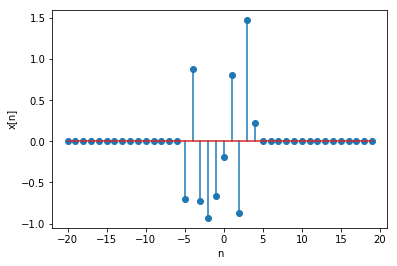

In [2]:
import numpy as np
import pylab as plt

n = np.arange(-20, 20)
x = np.zeros(len(n))
x[(n>=-5) & (n<5)] = np.random.normal(size=10)

plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x[n]')

### Звуковой сигнал

In [5]:
from scipy.io.wavfile import read, write
import sounddevice as sd

fs, x = read('../data/cw_flute_shot091.wav')
n = np.arange(len(x))
x = x[:, 0] #запись правого канала
print('Fs = {}\nx[n] = {}'.format(fs, x))

sd.play(x, fs)

Fs = 44100
x[n] = [48 51 55 ...,  0  1  0]


In [ ]:
%matplotlib inline
plt.plot(n, x)
plt.xlabel('n')
plt.ylabel('x[n]')

In [ ]:
slc = (n>1000) & (n<2000)
plt.plot(n[slc], x[slc])
plt.xlabel('n')
plt.ylabel('x[n]')

In [ ]:
slc = (n>1900) & (n<2000)
x_slice = x[slc]
n_slice = n[slc]

plt.plot(n_slice, x_slice)
plt.xlabel('n')
plt.ylabel('x[n]')

In [ ]:
slc = (n>1900) & (n<2000)

plt.stem(n_slice, x_slice)
plt.xlabel('n')
plt.ylabel('x[n]')

In [ ]:
slc = (n>1900) & (n<2000)
t_slice = n_slice/fs
plt.stem(t_slice, x_slice)
plt.xlabel('t')
plt.ylabel('x[n]')
plt.grid()

In [ ]:
t1 = 0.0445 - 0.0435
f1 = 1/t1
print('Период ~= {:.3f}s'.format(t1))
print('Частота ~= {:.3f}Hz'.format(f1))

In [ ]:
x_sim_slice = np.sin(2*np.pi*f1*t_slice)*20000
plt.stem(x_sim_slice)

In [ ]:
%matplotlib inline
t = n/fs
x_sim = np.sin(2*np.pi*f1*t)*20000
plt.plot(x_sim)
sd.play(x_sim, fs)


In [ ]:
x_sim2 = np.zeros(len(x))*0
x_sim2[(t>0.02) & (t<0.12)] = np.sin(2*np.pi*21900*t[(t>0.02) &(t<0.12)])*20000
x_sim2[(t>0.2) & (t<0.27)] = np.sin(2*np.pi*21800*t[(t>0.2) & (t<0.27)])*20000
x_sim2[(t>0.41) & (t<0.48)] = np.sin(2*np.pi*22030*t[(t>0.41) & (t<0.48)])*20000
plt.plot(t, x_sim2)
plt.plot(t, x, alpha=0.5)

sd.play(x_sim2, fs)

## Базовые сигналы
### Еденичный испульс  (unit sample)
$\delta[n] = \begin{cases}
0, n\ne0,\\
1, n=0\\
\end{cases}$

In [ ]:
n = np.arange(-20, 20)
delta_n = (n==0).astype(int)

plt.stem(n, delta_n)
plt.xlabel('n')
plt.ylabel('x[n]')
#sd.play(delta_n, fs)

Операция сдвига:

$\delta[n-k] = \begin{cases} 0, n-k\ne0,\\ 1, n-k=0\\ \end{cases} = 
\begin{cases} 0, n\ne k,\\ 1, n=k\\ \end{cases}$

In [ ]:
def delta_n_minus_k(k):
    return (n==k).astype(int)

#x = [x[k]*delta_nk(k) for k in n]
plt.stem(n, delta_n_minus_k(5))

Любую последовательность можно представить в виде суммы взвешенных еденичных импульсов:

$x[n] = \sum_{k=-\infty}^\infty x[k]\delta[n-k]$

In [ ]:
x_n = np.zeros(len(n))
x_n[(n>=0) & (n<3)] = [1, 2, -1]
plt.stem(n, x_n)
plt.grid()


In [ ]:
x2_n = np.array([x_n[n==k]*delta_n_minus_k(k) for k in n]).sum(0)
plt.stem(n, x2_n)
plt.grid()

### Еденичный скачок (unit step)

$u[n] = \begin{cases}
1, n\ge0,\\
0, n<0\\
\end{cases}$

Связь с еденичным испульсом:

$u[n] = \sum_{k=-\infty}^\infty u[k]\delta[n-k] = \sum_{k=0}^\infty \delta[n-k]$

Представление еденичного испульса через еденичные скачки:

$\delta[n] = u[n] - u[n-1]$

In [ ]:
u_n = (n>=0).astype(int)
u_nm1 = (n-1>=0).astype(int)

In [ ]:
plt.plot(n, u_n+0.1, 'o', label='u[n]')
plt.plot(n, -u_nm1-0.1, 'o', label='-u[n-1]')
plt.plot(n, u_n-u_nm1, 'o', label='u[n]-u[n-1]')
plt.grid()
plt.legend()

### Экспоненциальная последовательность

$x[n] = A\alpha^n$

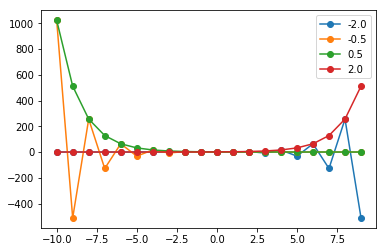

In [4]:
n = np.arange(-10, 10)
def exp_seq(alpha, A=1):
    return A*(alpha**n)

for alpha in [-2., -0.5, 0.5, 2.]:
    plt.plot(n, exp_seq(alpha), 'o-',label=str(alpha))
    
plt.legend()

$x[n] = A\alpha^n$

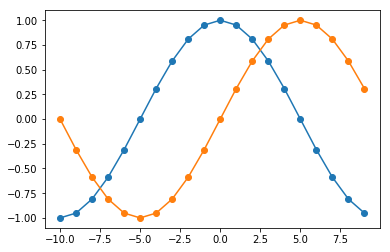

In [5]:
alpha = np.exp(2j*np.pi/20)
plt.plot(n, exp_seq(alpha).real, 'o-')
plt.plot(n, exp_seq(alpha).imag, 'o-')

$x[n] = A\alpha^n = (e^{j2\pi/20})^n = e^{j2\pi n/20} = cos(2\pi n/20)+j\cdot sin(2\pi n/20)$

C:\Software\miniconda\envs\nfb5\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


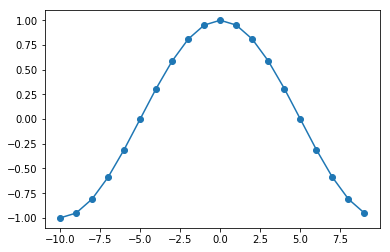

In [6]:
alpha = np.exp(2j*np.pi/20 + 4j*np.pi)
plt.plot(n, exp_seq(alpha), 'o-')

### Синусоидальный сигнал

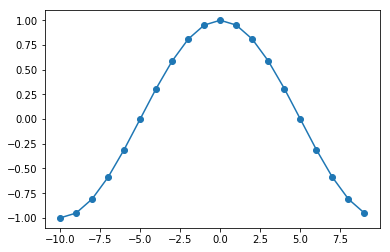

In [7]:
def cos(w_0):
    return np.cos(w_0*n)

w_0 = 2*np.pi/20
plt.plot(n, cos(w_0), 'o-')

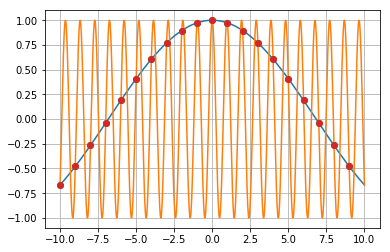

In [8]:
w_0 = 0.23
w_1 = w_0 + 2*np.pi

t = np.linspace(-10, 10, 1000)
plt.plot(t, np.cos(w_0*t), '-')
plt.plot(t, np.cos(w_1*t), '-')

plt.plot(n, cos(w_0), 'o')
plt.plot(n, cos(w_1), 'o')
plt.grid()
#plt.xlim(-5, 5)

$x[n] = cos(w_0n) = cos\big((w_0 +2\pi r)n\big)$ где $r\in Z$.
Следовательно достаточно рассматривать $w_0$ только на диапазоне (-$\pi$, $\pi$]

## Свойство периодичности сигналов

Сигнал $x[n]$ назыается передическим с периодом $N$ если:

$x[n] = x[n+N]$ для всех n

Для синусоидального сигнала:

$x[n] = cos(w_0n)$

$x[n+N] = cos(w_0n+w_0N)$

$w_0N = 2\pi k$

$w_0 = 2\pi k/N$

Аналогично для экспоненциальной последовательности

### Примеры

Найти периоды:

$x_1[n] = cos(\pi/4 \cdot n)$


$x_2[n] = cos(3\pi/8 \cdot n)$

$x_3[n] = cos(n)$

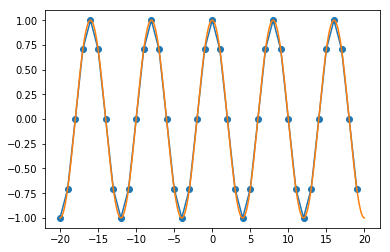

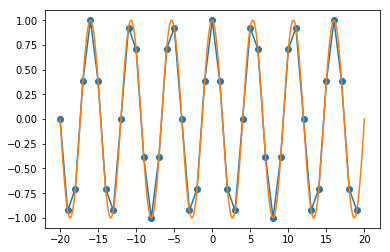

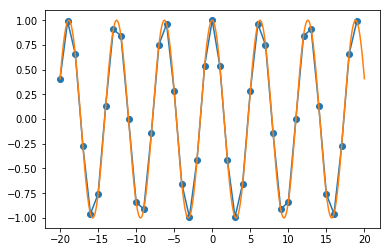

In [9]:
n = np.arange(-20, 20)
t = np.linspace(-20, 20, 1000)

plt.plot(n, cos(np.pi/4), 'o-')
plt.plot(t, np.cos(np.pi/4*t), '-')
plt.show()
plt.plot(n, cos(3*np.pi/8), 'o-')
plt.plot(t, np.cos(3*np.pi/8*t), '-')
plt.show()
plt.plot(n, cos(1), 'o-')
plt.plot(t, np.cos(t), '-')
plt.show()

## Вопрос
Сколько всего синусоидальных сигналов типа $x[n]=cos(w_0n)$ c периодом N=4 отсчета?
$w_0 = 2\pi k/N$


.

.

.

.

.

.

.

.

.

.
.
.












$w_0 \in [0, 2\pi/4, 2\pi/4, 2\pi 3/4]$ 

$w_0 \in [0, \pi/2, \pi, 1\pi 3/2]$ 